In [2]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
print(datetime.datetime.now())

2022-07-20 10:42:09.209339


In [3]:
df = pd.read_csv("/Users/orenkobo/Desktop/PhD/HebLingStudy/ts_data/Artifacts2/df_new_full__unsegmented_alldata_new_FINAL.csv",
                 index_col=None,
                 converters={'alephbert_enc': eval,
                             '1d_vgg_featuremap' : eval,
                             'x_gaze_location' : eval,
                             'x_gaze_location_normalized' : eval
                             # 'phq_label': bool
                             })
print(df.shape)
df.head(4)

(9696, 31)


,Subject,sentence_run_num,sentence_trial_num,Sentence,Sentence_type,set_num,fixation_words_order,trial_total_distance_covered,sentence_pupil_diameter_mean,sentence_pupil_diameter_vec,...,x_gaze_location_r_scaled,x_gaze_location_normalized,sentence_pupil_diameter_vec_normalized,Sentence_type_A,Sentence_type_B,Sentence_type_C,Sentence_type_D,Sentence_type_F,alephbert_enc,words_order
0,3,0,0,המוזיקה היתה נעימה ועוררה השראה בקרב קהל השומעים,A,17,בקרב(5)->השומעים(7)->השומעים(7)->קהל(6)->השומע...,5903.195480,5110.630668,"[5257.0, 5257.0, 5257.0, 5257.0, 5257.0, 5257....",...,"[0.0043134435657800185, 0.0007189072609633364,...","[0.00510993203327465, 0.004940728985815224, 0....","[0.9342230695900859, 0.9342230695900859, 0.934...",1,0,0,0,0,"[0.48126277029514314, 0.2406933257356286, -0.1...","['בקרב', 'השומעים', 'השומעים', 'קהל', 'השומעים..."
1,3,0,1,"כדי לתפוס דגים, הדייג הפליג למרחק",F,99,NaN,3560.188783,5014.160436,"[5326.0, 5326.0, 5326.0, 5326.0, 5326.0, 5326....",...,"[-0.04324324324324324, -0.04324324324324324, -...","[-0.0036331085544076573, -0.003633108554407657...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,0,0,0,1,"[-0.14811759690443674, -0.9101220783260133, -0...",[]
2,3,0,2,אסף בנה מגדל עם הקוביות שקיבל מהוריו,F,99,NaN,5188.171475,4867.177487,"[5097.0, 5097.0, 5097.0, 5097.0, 5097.0, 5097....",...,"[0.429406554472985, 0.43578387953941544, 0.439...","[0.02025455979969127, 0.020566168411994212, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,0,0,0,1,"[1.0683965989285045, -0.01104319178395801, -0....",[]
3,3,0,3,"לכבוד יום ההולדת של דנה, היא החליטה לתכנן מסיבה",F,99,NaN,4638.881573,4856.822468,"[5062.0, 5062.0, 5062.0, 5062.0, 5062.0, 5062....",...,"[0.061742006615215, 0.07850055126791622, 0.069...","[0.014576516292041073, 0.015347975371564139, 0...","[1.0000000000000009, 1.0000000000000009, 1.000...",0,0,0,0,1,"[0.9036410391330719, 0.4634173482656479, -1.17...",[]


In [4]:
def apply_phq_cutoff(df , neg_phq_cutoff, pos_phq_cutoff):
    df["phq_binary_label"] = [0.0 if x <= neg_phq_cutoff else 1.0 if x >= pos_phq_cutoff else "other" for x in df.phq_score]
    df = df[df.phq_binary_label!= 'other']
    return df

override_cutoff = [7, 8]
df = apply_phq_cutoff(df, neg_phq_cutoff = override_cutoff[0], pos_phq_cutoff = override_cutoff[1] )
df['is_experimental_sentence'] = [False if x=='F' else True for x in df.Sentence_type]
df

,Subject,sentence_run_num,sentence_trial_num,Sentence,Sentence_type,set_num,fixation_words_order,trial_total_distance_covered,sentence_pupil_diameter_mean,sentence_pupil_diameter_vec,...,sentence_pupil_diameter_vec_normalized,Sentence_type_A,Sentence_type_B,Sentence_type_C,Sentence_type_D,Sentence_type_F,alephbert_enc,words_order,phq_binary_label,is_experimental_sentence
0,3,0,0,המוזיקה היתה נעימה ועוררה השראה בקרב קהל השומעים,A,17,בקרב(5)->השומעים(7)->השומעים(7)->קהל(6)->השומע...,5903.195480,5110.630668,"[5257.0, 5257.0, 5257.0, 5257.0, 5257.0, 5257....",...,"[0.9342230695900859, 0.9342230695900859, 0.934...",1,0,0,0,0,"[0.48126277029514314, 0.2406933257356286, -0.1...","['בקרב', 'השומעים', 'השומעים', 'קהל', 'השומעים...",0.0,True
1,3,0,1,"כדי לתפוס דגים, הדייג הפליג למרחק",F,99,NaN,3560.188783,5014.160436,"[5326.0, 5326.0, 5326.0, 5326.0, 5326.0, 5326....",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,0,0,0,1,"[-0.14811759690443674, -0.9101220783260133, -0...",[],0.0,False
2,3,0,2,אסף בנה מגדל עם הקוביות שקיבל מהוריו,F,99,NaN,5188.171475,4867.177487,"[5097.0, 5097.0, 5097.0, 5097.0, 5097.0, 5097....",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,0,0,0,1,"[1.0683965989285045, -0.01104319178395801, -0....",[],0.0,False
3,3,0,3,"לכבוד יום ההולדת של דנה, היא החליטה לתכנן מסיבה",F,99,NaN,4638.881573,4856.822468,"[5062.0, 5062.0, 5062.0, 5062.0, 5062.0, 5062....",...,"[1.0000000000000009, 1.0000000000000009, 1.000...",0,0,0,0,1,"[0.9036410391330719, 0.4634173482656479, -1.17...",[],0.0,False
4,3,0,4,"מכיוון שרצינו לאוורר את כל הבית, עברנו בחדרים ...",F,99,NaN,5586.889371,5061.816554,"[5030.0, 5030.0, 5030.0, 5030.0, 5030.0, 5030....",...,"[0.5790754257907533, 0.5790754257907533, 0.579...",0,0,0,0,1,"[0.8396753600010505, 0.20849608902174693, -0.7...",[],0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,139,2,27,"ליוני היה פאנצ'ר, לכן היה צריך להחליף גלגל",F,99,NaN,4121.269918,4925.350295,"[4902.0, 4902.0, 4902.0, 4902.0, 4902.0, 4902....",...,"[0.9289368959636156, 0.9289368959636156, 0.928...",0,0,0,0,1,"[0.5647261874242262, -0.40860897438092664, -0....",[],1.0,False
9692,139,2,28,"לאחר שראו את המודעה, המשפחה החליטה לאמץ כלב",F,99,NaN,4123.302945,5012.440349,"[5277.0, 5277.0, 5277.0, 5277.0, 5277.0, 5277....",...,"[0.9793986636971046, 0.9793986636971046, 0.979...",0,0,0,0,1,"[1.006677230613099, 0.020554773923423555, -0.5...",[],1.0,False
9693,139,2,29,התושבים חיו באוויר ההרים ובריאותם היתה מעולה ל...,A,27,NaN,7412.574193,4934.199434,"[5388.0, 5388.0, 5388.0, 5388.0, 5388.0, 5388....",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1,0,0,0,0,"[0.053297266364097595, -0.07538636246075232, -...",[],1.0,True
9694,139,2,30,הרומן היה שטחי והסטודנט קרא אותו בשקיקה במהלך ...,C,4,NaN,5879.492251,5056.427875,"[5112.0, 5112.0, 5112.0, 5112.0, 5112.0, 5112....",...,"[0.9442186922792759, 0.9442186922792759, 0.944...",0,0,1,0,0,"[-0.11343806338581172, 0.3203997625546022, -0....",[],1.0,True


In [5]:
timepoint_cols = [f"timepoint#{i}" for i in range(875)]
id_cols = ["phq_binary_label", "phq_score","phq_group","Subject", "Sentence_type", "set_num","is_experimental_sentence"]
timeseries_df = pd.DataFrame(data = df.x_gaze_location_normalized.to_list() , columns = timepoint_cols)
timeseries_df[id_cols] = df[id_cols]
timeseries_df = timeseries_df.iloc[:,200:]
timepoint_cols = [x for x in list(timeseries_df.columns) if "timepoint" in x]
timeseries_df

,timepoint#200,timepoint#201,timepoint#202,timepoint#203,timepoint#204,timepoint#205,timepoint#206,timepoint#207,timepoint#208,timepoint#209,...,timepoint#872,timepoint#873,timepoint#874,phq_binary_label,phq_score,phq_group,Subject,Sentence_type,set_num,is_experimental_sentence
0,0.042233,0.042030,0.042301,0.042538,0.042165,0.041929,0.041895,0.042301,0.042030,0.041929,...,-0.018612,-0.018477,-0.018477,0.0,7.0,Mild,3,A,17,True
1,-0.029753,-0.029486,-0.029065,-0.028912,-0.028912,-0.028606,-0.028338,-0.028376,-0.028835,-0.028988,...,NaN,NaN,NaN,0.0,7.0,Mild,3,F,99,False
2,-0.056955,-0.056678,-0.056367,-0.056159,-0.055743,-0.055570,-0.055397,-0.055189,-0.054912,-0.054289,...,NaN,NaN,NaN,0.0,7.0,Mild,3,F,99,False
3,-0.070812,-0.071055,-0.071055,-0.070609,-0.070122,-0.070568,-0.071827,-0.071949,-0.071705,-0.072761,...,NaN,NaN,NaN,0.0,7.0,Mild,3,F,99,False
4,-0.040378,-0.039760,-0.040069,-0.040687,-0.040309,-0.039828,-0.039554,-0.039382,-0.039245,-0.039245,...,NaN,NaN,NaN,0.0,7.0,Mild,3,F,99,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,-0.070560,-0.074675,-0.074290,-0.071945,-0.071176,-0.071214,-0.072060,-0.073252,-0.071868,-0.073906,...,NaN,NaN,NaN,1.0,8.0,Mild,139,F,99,False
9692,-0.074359,-0.074120,-0.074160,-0.074240,-0.074040,-0.073960,-0.074160,-0.075476,-0.075237,-0.074678,...,NaN,NaN,NaN,1.0,8.0,Mild,139,F,99,False
9693,0.033922,0.034328,0.017063,0.011680,0.011477,0.011511,0.011883,0.012289,0.012323,0.012763,...,-0.009479,0.009547,0.011206,1.0,8.0,Mild,139,A,27,True
9694,0.059150,0.059421,0.059591,0.058878,0.058845,0.058811,0.058845,0.059014,0.044803,0.046329,...,NaN,NaN,NaN,1.0,8.0,Mild,139,C,4,True


In [6]:
per_subject_settype_mean_df = timeseries_df.groupby(["Subject","Sentence_type","phq_group"]).mean()
per_subject_settype_mean_df = per_subject_settype_mean_df.reset_index()
per_subject_settype_mean_df = per_subject_settype_mean_df.ffill()
per_subject_settype_mean_df

,Subject,Sentence_type,phq_group,timepoint#200,timepoint#201,timepoint#202,timepoint#203,timepoint#204,timepoint#205,timepoint#206,...,timepoint#869,timepoint#870,timepoint#871,timepoint#872,timepoint#873,timepoint#874,phq_binary_label,phq_score,set_num,is_experimental_sentence
0,3,A,Mild,-0.017154,-0.017260,-0.017378,-0.017500,-0.019254,-0.021557,-0.021654,...,-0.011217,-0.009965,-0.006494,-6.110753e-03,-0.005974,-0.006000,0.0,7.0,18.125,1.0
1,3,B,Mild,-0.021751,-0.021811,-0.021844,-0.021994,-0.023854,-0.025398,-0.025532,...,-0.001352,-0.000159,0.003081,3.174283e-03,0.003242,0.003250,0.0,7.0,16.375,1.0
2,3,C,Mild,0.001274,0.001277,0.001220,0.001223,-0.000711,-0.003183,-0.003524,...,-0.007203,-0.006208,-0.003487,-3.480197e-03,-0.003595,-0.003528,0.0,7.0,15.500,1.0
3,3,D,Mild,-0.018829,-0.018676,-0.021549,-0.030730,-0.031347,-0.031331,-0.031120,...,-0.007766,-0.007766,-0.007834,-7.927157e-03,-0.008139,-0.008249,0.0,7.0,12.000,1.0
4,3,F,Mild,-0.022037,-0.022355,-0.022593,-0.023137,-0.023042,-0.022807,-0.022800,...,-0.000153,-0.000066,0.000064,-4.945790e-07,-0.000114,-0.000154,0.0,7.0,99.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,139,A,Mild,0.007804,0.008061,0.006420,0.007945,0.007992,0.005794,0.003794,...,0.003902,0.002183,0.002450,5.037131e-03,0.007581,0.007900,1.0,8.0,14.125,1.0
501,139,B,Mild,-0.002527,-0.004164,-0.004124,-0.006966,-0.007598,-0.007229,-0.006940,...,-0.009602,-0.009515,-0.009902,-1.035644e-02,-0.010516,-0.010221,1.0,8.0,16.500,1.0
502,139,C,Mild,0.005929,0.006035,0.005916,0.005666,0.005544,0.005569,0.005658,...,-0.003316,-0.003469,-0.003244,-3.959242e-03,-0.004153,-0.004114,1.0,8.0,13.625,1.0
503,139,D,Mild,-0.013124,-0.013150,-0.015144,-0.018971,-0.019729,-0.018947,-0.018767,...,-0.000556,-0.000793,-0.000912,1.795829e-03,0.004809,0.005328,1.0,8.0,17.750,1.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mild'),
  Text(1, 0, 'Minimal'),
  Text(2, 0, 'Moderately Severe'),
  Text(3, 0, 'Moderate'),
  Text(4, 0, 'Severe')])

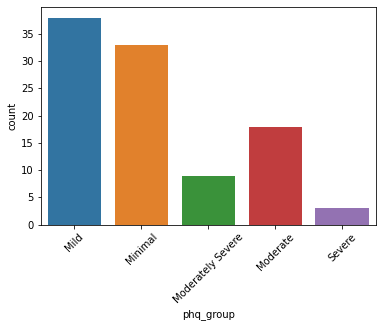

In [7]:
ax = sns.countplot(x="phq_group", data=per_subject_settype_mean_df[per_subject_settype_mean_df.Sentence_type=="A"])
plt.xticks(rotation=45)


In [8]:
phq_scores_vec = per_subject_settype_mean_df[per_subject_settype_mean_df.Sentence_type=="A"].phq_score

Text(6.5, 13, 'Median')

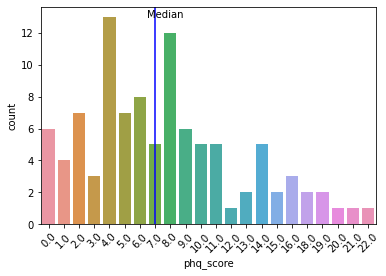

In [16]:
ax = sns.countplot(x=phq_scores_vec, data=per_subject_settype_mean_df[per_subject_settype_mean_df.Sentence_type=="A"])
plt.xticks(rotation=45)
plt.axvline(phq_scores_vec.median(), color='blue')
plt.text(x=6.5, y=13, s="Median")

/Users/orenkobo/Desktop/PhD/Aim1/Aim1/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


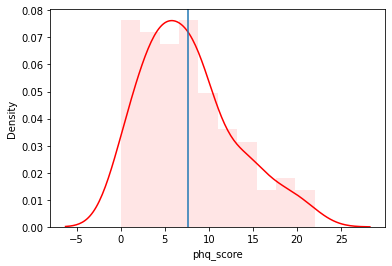

In [19]:
import matplotlib.pyplot as plt
sns.distplot(phq_scores_vec, color = 'r'
             ,bins= 10, hist_kws={ "alpha": 0.1})
plt.axvline(np.mean(phq_scores_vec))